dict_keys(['mpcParam', 'timestamp', 'referState', 'actualState', 'ctrlCmd', 'globalPoint'])
Number of refer states: 400
Number of actual states: 400
Number of global path: 401
Number of control commands: 400


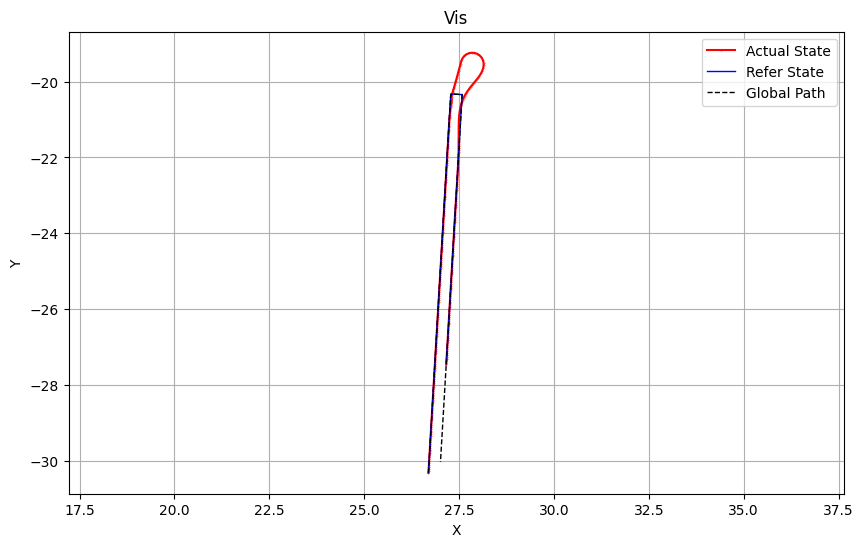

In [1]:
import os
import glob
import matplotlib.pyplot as plt
from google.protobuf.json_format import MessageToDict
from generated.tracking_data_pb2 import TrackingData


def load_protobuf_data(file_path):
    tracking_data = TrackingData()
    with open(file_path, "rb") as f:
        tracking_data.ParseFromString(f.read())
    return tracking_data


def extract_trajectories(tracking_data):
    data_dict = MessageToDict(tracking_data)
    print(data_dict.keys())
    refer_states = data_dict.get("referState", [])
    actual_states = data_dict.get("actualState", [])
    global_path = data_dict.get("globalPoint", [])
    ctrl_cmd = data_dict.get("ctrlCmd", [])
    refer_x = [state["x"] for state in refer_states]
    refer_y = [state["y"] for state in refer_states]
    actual_x = [state["x"] for state in actual_states]
    actual_y = [state["y"] for state in actual_states]
    global_x = [state["x"] for state in global_path]
    global_y = [state["y"] for state in global_path]
    ctrl_v = [cmd["v"] for cmd in ctrl_cmd]
    ctrl_omega = [cmd["omega"] for cmd in ctrl_cmd]
    print(f"Number of refer states: {len(refer_states)}")
    print(f"Number of actual states: {len(actual_states)}")
    print(f"Number of global path: {len(global_x)}")
    print(f"Number of control commands: {len(ctrl_v)}")
    return refer_x, refer_y, actual_x, actual_y, global_x, global_y, ctrl_v, ctrl_omega


def plot_trajectories(refer_x, refer_y, actual_x, actual_y, global_x, global_y):
    plt.figure(figsize=(10, 6))
    plt.plot(
        actual_x,
        actual_y,
        label="Actual State",
        marker=".",
        markersize=0.5,
        color="red",
    )
    plt.plot(
        refer_x,
        refer_y,
        label="Refer State",
        linestyle="-",
        linewidth=1,
        color="blue",
    )
    plt.plot(
        global_x,
        global_y,
        label="Global Path",
        linestyle="--",
        linewidth=1,
        color="black",
    )
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")
    plt.title("Vis")
    plt.legend()
    plt.grid(True)
    plt.show()


def main():
    protobuf_file_path = ""
    folder_path = "/tmp/ros/proto/traj_tracking/"
    files = glob.glob(os.path.join(folder_path, "*"))

    if len(files) == 1:
        protobuf_file_path = files[0]
    else:
        print("Error: The directory does not contain exactly one file.")

    tracking_data = load_protobuf_data(protobuf_file_path)
    refer_x, refer_y, actual_x, actual_y, global_x, global_y, ctrl_v, ctrl_omega = (
        extract_trajectories(tracking_data)
    )
    plot_trajectories(refer_x, refer_y, actual_x, actual_y, global_x, global_y)


if __name__ == "__main__":
    main()